# Importing Libraries

In [53]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the Data

In [54]:
df=pd.read_csv('Advertising.csv')

In [55]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [56]:
df=df.drop('Unnamed: 0',axis=1)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [58]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [59]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

No null values present in the data

In [60]:
df.shape

(200, 4)

# Relationship between Features and Target

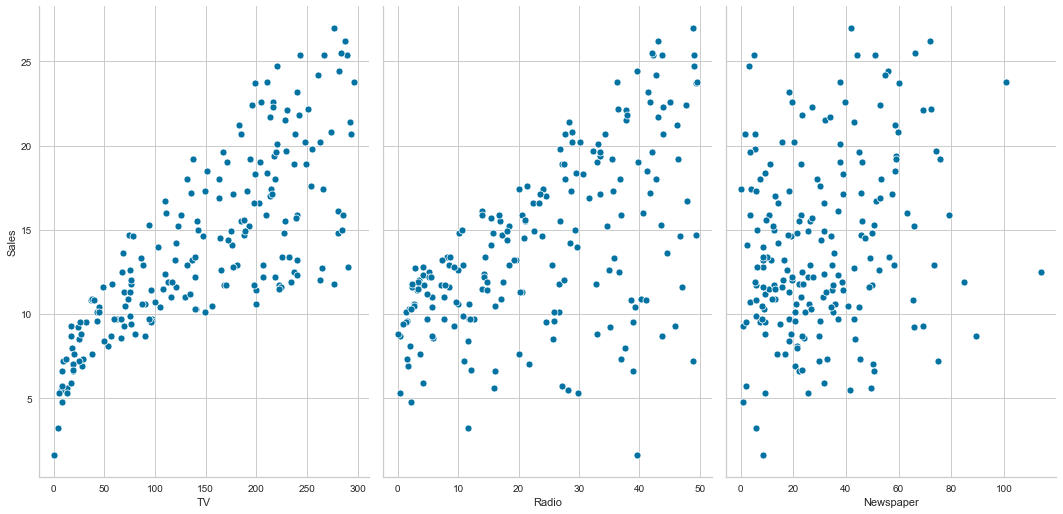

In [61]:
sns.pairplot(df,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',height=7,aspect=0.7)

TV seems to be the most linearly related the target variable in comparison to other features.

# Estimating the coefficients of Multiple Linear Regression

In [62]:
from sklearn.linear_model import LinearRegression

X=df[['TV','Radio','Newspaper']]
y=df['Sales']

lm1=LinearRegression()
lm1.fit(X,y)

print(lm1.intercept_)
print(lm1.coef_)


2.9388893694594103
[ 0.04576465  0.18853002 -0.00103749]


In [63]:
list(zip(['TV','Radio','Newspaper'],lm1.coef_))

[('TV', 0.0457646454553976),
 ('Radio', 0.18853001691820442),
 ('Newspaper', -0.0010374930424763007)]

For increasing the amount spent on advertising by Radio by a thousand dollars for a fixed value of TV and Newspaper expenditure, we get an increase of 188 units in sales due to Radio Advertisement

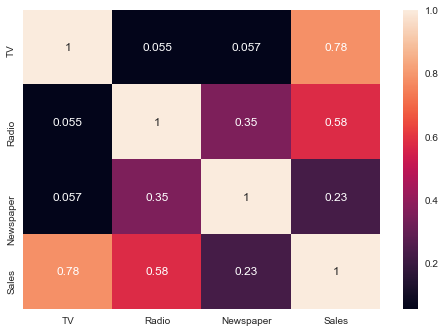

In [64]:
sns.heatmap(df.corr(),annot=True)

# Feature Selection

We will use R^2 score as measure of how good the model is i.e. measure of how close the data are to the fitted regressioIn line.

R^2 statistic is the amount of variance in the target variable explained by the features

In [65]:
from sklearn.metrics import r2_score

In [66]:
lm2=LinearRegression().fit(X[['TV','Radio']],y)
lm2_predict=lm2.predict(X[['TV','Radio']])

print('R^2 :',r2_score(y,lm2_predict))

R^2 : 0.8971942610828956


In [67]:
lm3=LinearRegression().fit(X[['TV','Radio','Newspaper']],y)
lm3_predict=lm3.predict(X[['TV','Radio','Newspaper']])

print('R^2 score :',r2_score(y,lm3_predict))

R^2 score : 0.8972106381789522


# Model Evaluation using train-test split and Metrics

In [68]:
from sklearn.model_selection import train_test_split

X=df[['TV','Radio','Newspaper']]
y=df['Sales']

X_train,X_test,Y_train,Y_test= train_test_split(X,y,test_size=0.2,random_state=1)

In [69]:
from sklearn.metrics import mean_squared_error

lm4=LinearRegression().fit(X_train,Y_train)

lm4_predict=lm4.predict(X_test)

print('RMSE :',np.sqrt(mean_squared_error(Y_test,lm4_predict)))
print('R^2 :',r2_score(Y_test,lm4_predict))

RMSE : 1.4113417558581587
R^2 : 0.8927605914615384


In [70]:

X=df[['TV','Radio']]
y=df['Sales']

X_train,X_test,Y_train,Y_test= train_test_split(X,y,test_size=0.2,random_state=1)

lm5=LinearRegression().fit(X_train,Y_train)

lm5_predict=lm5.predict(X_test)


print('RMSE :',np.sqrt(mean_squared_error(Y_test,lm5_predict)))
print('R^2 :',r2_score(Y_test,lm5_predict))

RMSE : 1.398292489077775
R^2 : 0.8947344950027066


Using a model without the feature 'Newspapers', we get a slightly better fit model and the RMSE is also lower.

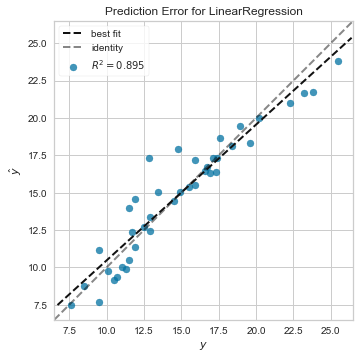

In [71]:
from yellowbrick.regressor import PredictionError,ResidualsPlot

visualizer=PredictionError(lm5).fit(X_train,Y_train)
visualizer.score(X_test,Y_test)

visualizer.poof()

# The Synergy Effect

Synergy in marketing is when two marketing initiatives create a response greater than the sum of the combined response the two would have elicited alone.

In [72]:
df['Synergy']=df['TV']*df['Radio']

In [73]:
X=df[['TV','Radio','Synergy']]
y=df['Sales']

In [74]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [75]:
lm6=LinearRegression().fit(X_train,Y_train)
lm6_predict=lm6.predict(X_test)

print('R^2 :',r2_score(Y_test,lm6_predict))
print('RMSE :',np.sqrt(mean_squared_error(Y_test,lm6_predict)))

R^2 : 0.9814463903900936
RMSE : 0.5870420254600713


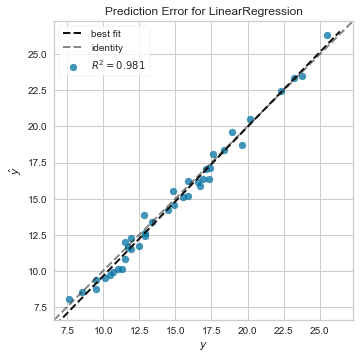

In [76]:
from yellowbrick.regressor import PredictionError,ResidualsPlot

visualizer=PredictionError(lm6).fit(X_train,Y_train)
visualizer.score(X_test,Y_test)

visualizer.poof()

We see a dramatic decrease in the RMSE and an increase in R^2 value which supports our use of 'Synergy' coefficient.